In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns


# Input analysis
Here the number of samples s is 10,000, so the recommended k number of intervals is between 100 and 20,000
according to the lecture slides.
The DOF = k - s - 1 where s is the number of parameters in the hypothesized distribution
So s = 1 for exponential distribution and s = 2 for normal distribution.
the probabilities for each interval = 1/k where k is the number of intervals
Here, we can choose k = 100.

We hypothesise the following:
1. Interarrival times are exponentially distributed with mean = mean of the interarrival times
2. Call durations (left shifted to by the minimum of the call durations) seem to conform to a normal distribution
3. Speeds are normally distributed with a mean and std equal to those of the data

Base stations are uniformly distributed as stated in the question.

In [2]:
df = pd.read_excel("PCS_TEST_DETERMINSTIC.xls")

interarrival_times = df["Arrival time (sec)"].iloc[1:].reset_index(drop=True) - df[
    "Arrival time (sec)"
].iloc[:-1].reset_index(drop=True)
interarrival_times = interarrival_times.tolist()

In [14]:
df.columns

Index(['Arrival no', 'Arrival time (sec)', 'Base station ',
       'Call duration (sec)', 'velocity (km/h)'],
      dtype='object')

#  Interarrival times

By plotting the interarrival times, we see that the distribution of the interarrival times follows a similar distribution to an exponential distribution.

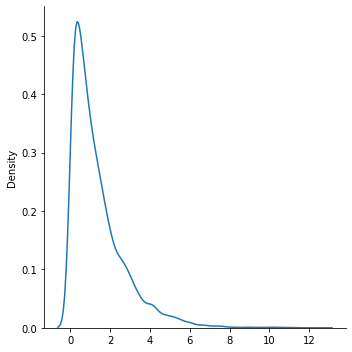

In [18]:
sns.displot(data=interarrival_times, kind="kde")

Here, we observe that the distribution of interarrival times follows a similar distribution to a exponential distribution

In [24]:
# Interarrival time
# since we let k = 1000, p_j = 1/1000 => n*p_j = 10
# k - s -1 = 98, and we choose the significance to be 0.95
k = 100
n = len(interarrival_times)
interval_prob = 1 / k
expected_counts_per_interval = n * interval_prob
beta = sum(interarrival_times) / len(interarrival_times)
interval_end_pts = [beta * np.log(1 / (1 - i * interval_prob)) for i in range(k)] + [
    np.inf
]
chi_square_statistic = 0
observed_frequencies = []
for left, right in zip(interval_end_pts[:-1], interval_end_pts[1:]):
    filtered = [time for time in interarrival_times if left <= time < right]
    interval_actual_count = len(filtered)
    observed_frequencies.append(interval_actual_count)
    interval_chi_square_statistic = (
        interval_actual_count - expected_counts_per_interval
    ) ** 2 / expected_counts_per_interval
    chi_square_statistic += interval_chi_square_statistic
print(
    "Chi square statistic for interarrival times: ",
    chi_square_statistic,
    "\nBeta for hypothesized exponential distribution: ",
    beta,
)
# ppf returns the value x for which the cdf of the distribution is >/ 0.95
if chi_square_statistic > stats.chi2.ppf(0.95,100-1-1):
    print("Reject null hypothesis, X does not conform to hypothesized distribution.")
else:
    print("Accept null hypothesis, X conforms to hypothesized distribution.")


Chi square statistic for interarrival times:  111.66106610661065 
Beta for hypothesized exponential distribution:  1.3698169264765245
Accept null hypothesis, X conforms to hypothesized distribution.


Since the chi square statistic is smaller than the critical value, we accept the null hypothesis that the interarrival times corresponds to an exponential distribution with a beta of 1.369.

# Call duration

By plotting the call duration, we also see a distribution that seem to be an exponential distribution. 

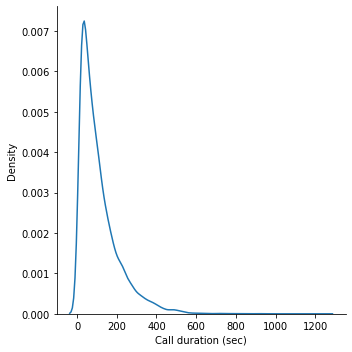

In [33]:
sns.displot(data=df, x = 'Call duration (sec)', kind= 'kde')

In [40]:
min_call_duration = df["Call duration (sec)"].min()
df["Call duration (sec)"] = df["Call duration (sec)"] - min_call_duration
beta = df["Call duration (sec)"].mean()
interval_end_pts = [beta * np.log(1 / (1 - i * interval_prob)) for i in range(k)] + [
    np.inf
]
call_durations = df["Call duration (sec)"]
chi_square_statistic = 0
observed_frequencies = []
for left, right in zip(interval_end_pts[:-1], interval_end_pts[1:]):
    filtered = [duration for duration in call_durations if left <= duration < right]
    interval_actual_count = len(filtered)
    observed_frequencies.append(interval_actual_count)
    interval_chi_square_statistic = (
        interval_actual_count - expected_counts_per_interval
    ) ** 2 / expected_counts_per_interval
    chi_square_statistic += interval_chi_square_statistic
print(
    "Chi square statistic for durations: ",
    chi_square_statistic,
    "\nBeta for hypothesized exponential distribution: ",
    beta,
)
# ppf returns the value x for which the cdf of the distribution is >/ 0.95
if chi_square_statistic > stats.chi2.ppf(0.95,100-1-1):
    print("Reject null hypothesis, X does not conform to hypothesized distribution.")
else:
    print("Accept null hypothesis, X conforms to hypothesized distribution.")


Chi square statistic for durations:  97.02980298029806 
Beta for hypothesized exponential distribution:  99.83194913549542
Accept null hypothesis, X conforms to hypothesized distribution.


Since the chi square statistic is smaller than the critical value, we accept the null hypothesis that the call duration corresponds to an exponential distribution with a beta of 99.83194913549542.

# Speed

By plotting the speed, we see a distribution that looks similar to a normal distribution

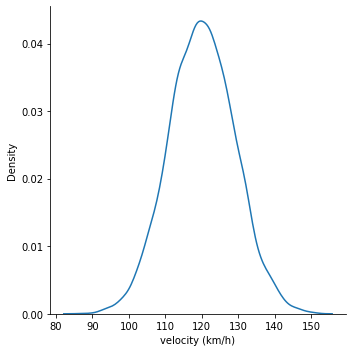

In [36]:
sns.displot(data=df, x = 'velocity (km/h)', kind= 'kde')

In [38]:
mean = df["velocity (km/h)"].mean()
std = df["velocity (km/h)"].std()
interval_end_pts = [
    stats.norm.ppf(i * interval_prob, loc=mean, scale=std) for i in range(k)
] + [np.inf]
speeds = df["velocity (km/h)"].tolist()
chi_square_statistic = 0
observed_frequencies = []
for left, right in zip(interval_end_pts[:-1], interval_end_pts[1:]):
    filtered = [speed for speed in speeds if left <= speed < right]
    interval_actual_count = len(filtered)
    observed_frequencies.append(interval_actual_count)
    interval_chi_square_statistic = (
        interval_actual_count - expected_counts_per_interval
    ) ** 2 / expected_counts_per_interval
    chi_square_statistic += interval_chi_square_statistic
print(
    "Chi square statistic for speed: ",
    chi_square_statistic,
    "\nMean for normal distribution: ",
    mean,
    "\nStd for normal distribution: ",
    std,
)

# ppf returns the value x for which the cdf of the distribution is >/ 0.95
if chi_square_statistic > stats.chi2.ppf(0.95,100-1-1):
    print("Reject null hypothesis, X does not conform to hypothesized distribution.")
else:
    print("Accept null hypothesis, X conforms to hypothesized distribution.")


Chi square statistic for speed:  96.30973097309734 
Mean for normal distribution:  120.07209801685764 
Std for normal distribution:  9.019057897896923
Accept null hypothesis, X conforms to hypothesized distribution.


Since the chi square statistic is smaller than the critical value, we accept the null hypothesis that the speed corresponds to an normal distribution with a mean of 120.07209801685764 and a standard deviation of 9.019057897896923.

# Base stations

It is already stated in the assignment that the starting point of the calls are uniformly distributed since it is mentioned that "the position of the car initiating a call in a cell is uniformly distributed along the section of the highway covered by the base station".

We verify this by plotting the distribution of base stations and it looks roughy uniform.

<Axes: xlabel='Base station ', ylabel='Count'>

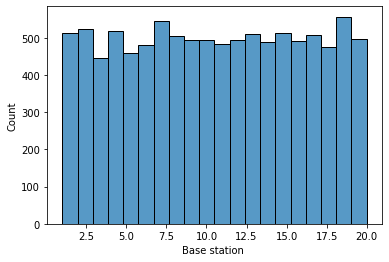

In [41]:
sns.histplot(data=df, x = 'Base station ', bins=20)

# Direction

Lastly, since it is stated that "the traffic volumes in the two directions are the same. This means the two directions of cars travelling along the highway have equal probabilities", in our simulation, we follow this distribution